## Linear Regression Model for Income Prediction

This project focuses on predicting per capita income using linear regression based on historical data. The main goal is to analyze the trend of per capita income over time and create a predictive model to forecast future income trends.

Per capita income is an important economic indicator that measures the average income earned per person in a given area (usually a country). Predicting per capita income can provide valuable insights into economic growth, standard of living, and income distribution.

In this project, we use linear regression, a popular machine learning technique, to model the relationship between time (years) and per capita income. By fitting a linear regression model to historical data, we aim to understand the trend in income growth and make predictions for future years.

#

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Sci-kit Learn library
from sklearn import linear_model

### Read past income data

In [4]:
df = pd.read_csv('canada_per_capita_income.csv')

In [5]:
print(df.head(3))
print()
print(df.isnull().sum())
print()
print(df.shape)
print()
print(df.info())

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484

year                       0
per capita income (US$)    0
dtype: int64

(47, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes
None


### Data Preparation

In [6]:
# Rounding column values to 2 decimal points
df['per_capita_income_(US$)'] = df['per capita income (US$)'].apply(lambda x : round(x, 2))

In [7]:
df.head(3)

,year,per capita income (US$),per_capita_income_(US$)
0,1970,3399.299037,3399.30
1,1971,3768.297935,3768.30
2,1972,4251.175484,4251.18


In [8]:
# Dropping duplicated column
df = df.drop('per capita income (US$)', axis = 1)


In [18]:
df.head(2)

,year,per_capita_income_(US$)
0,1970,3399.3
1,1971,3768.3


### Plot scatter graph to analyse linear correlation between year and income

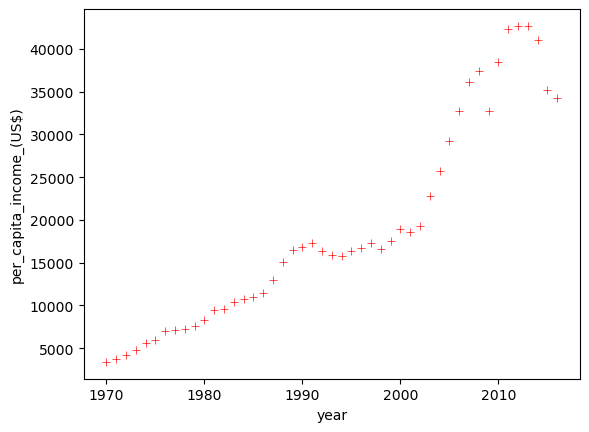

In [9]:
sns.scatterplot(x = 'year', y = 'per_capita_income_(US$)', data = df, color='red', marker='+')
plt.show()

### Building linear Regression model

In [10]:
# Fit curve into the regression model
reg = linear_model.LinearRegression()
reg.fit(df[['year']], df['per_capita_income_(US$)'])

LinearRegression()

In [11]:
# Check for single value
reg.predict([[2047]])

array([63657.2518432])

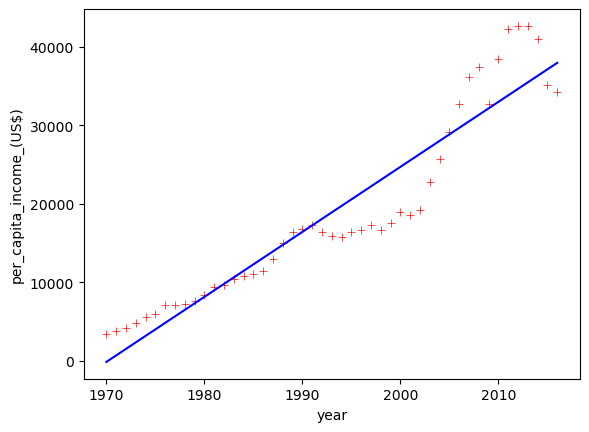

In [12]:
# Graph to see how predicted values fit the linear regression line
sns.scatterplot(x = 'year', y = 'per_capita_income_(US$)', data = df, color='red', marker='+')
plt.plot(df['year'], reg.predict(df[['year']]), color = 'Blue')
plt.show()

### Import csv file containing values for prediction

In [13]:
income_to_predict = pd.read_csv('income_to_predict.csv')
income_to_predict.head()

,year
0,2020
1,2021
2,2022
3,2023
4,2024


In [14]:
# prediction for values in csv file
predicted_income = reg.predict(income_to_predict)

In [15]:
income_to_predict['predicted_income'] = predicted_income

In [16]:
income_to_predict.head()

,year,predicted_income
0,2020,41288.694751
1,2021,42117.159829
2,2022,42945.624906
3,2023,43774.089984
4,2024,44602.555061


In [17]:
# Exporting predicted result to csv file
income_to_predict.to_csv('Result_predicted_income.csv', index = False)

In [19]:
reg.coef_

array([828.46507747])

In [20]:
reg.intercept_

-1632210.7617472245